# DOGS Vs. Cats -- CNN Classification

***Done by***: <br>
Larbi Farihi - 260676506 <br>
Finn Dong -  2605122422<br>
Di Gao -  260993844<br>
Eldon Wen - 260949749 <br>

### Connect Kaggle and download Cats Vs Dogs dataset

In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [19]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [20]:
# Download dataset
!kaggle datasets download -d biaiscience/dogs-vs-cats

100% 817M/817M [00:08<00:00, 106MB/s]



In [21]:
# unzipping the files and deleting the zip files
!unzip \*.zip  && rm *.zip

# Check the content in the working directory 
!ls

Streaming output truncated to the last 5000 lines.
  inflating: train/train/dog.55.jpg  
  inflating: train/train/dog.550.jpg  
  inflating: train/train/dog.5500.jpg  
  inflating: train/train/dog.5501.jpg  
  inflating: train/train/dog.5502.jpg  
  inflating: train/train/dog.5503.jpg  
  inflating: train/train/dog.5504.jpg  
  inflating: train/train/dog.5505.jpg  
  inflating: train/train/dog.5506.jpg  
  inflating: train/train/dog.5507.jpg  
  inflating: train/train/dog.5508.jpg  
  inflating: train/train/dog.5509.jpg  
  inflating: train/train/dog.551.jpg  
  inflating: train/train/dog.5510.jpg  
  inflating: train/train/dog.5511.jpg  
  inflating: train/train/dog.5512.jpg  
  inflating: train/train/dog.5513.jpg  
  inflating: train/train/dog.5514.jpg  
  inflating: train/train/dog.5515.jpg  
  inflating: train/train/dog.5516.jpg  
  inflating: train/train/dog.5517.jpg  
  inflating: train/train/dog.5518.jpg  
  inflating: train/train/dog.5519.jpg  
  inflating: train/train/dog.552.

### Importing Basic Libraries

In [22]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import random
import cv2 ## read and resize the images
import os

import warnings
warnings.simplefilter('ignore')

# importing libraries for deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

### Reading the datafiles

In [23]:
# specifying dataset directories
train_dir = "/content/gdrive/MyDrive/Kaggle/train/train"  ## Set the training dataset directory
test_dir = "/content/gdrive/MyDrive/Kaggle/test/test"     ## Set the training dataset directory

print('number of training images - ',len(os.listdir(train_dir)))
print('number of testing images - ',len(os.listdir(test_dir)))

number of training images -  25000
number of testing images -  12500


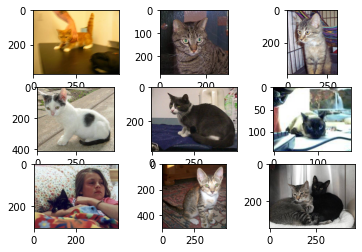

In [24]:
# plot Cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/content/gdrive/MyDrive/Kaggle/train/train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder+'cat.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

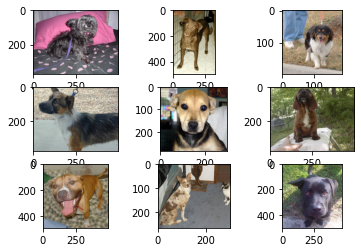

In [25]:
# plot Dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/content/gdrive/MyDrive/Kaggle/train/train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder+'dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

### Image processing and Creating Training & Testing Data

In [26]:
IMG_SIZE = 60 ## set the image size to resize all the images for processing
CATEGORIES = ["cat", "dog"]

In [27]:
CATEGORIES.index("cat")

0

Find index for Cats and Dogs
1.   Cat is 0
2.   Dog is 1



In [28]:
# creating training dataset
def create_training_data():
    training_data  = []
    images = []
    labels = []
    
    imagefiles = [os.path.join(train_dir,f) for f in os.listdir(train_dir)]
    for image in imagefiles:
        category = image.split('/')[-1].split('.')[0]
        img_array = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) ### resize the image
        training_data .append([new_array, CATEGORIES.index(category)])
        
    random.shuffle(training_data)
    for features,label in training_data:
        images.append(features)
        labels.append(label)
    images = np.array(images).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    
    return images, labels

images, labels = create_training_data()

In [29]:
print("The total number of images:", len(images))

The total number of images: 25000


In [30]:
# creating testing data; testing data doesn't have the image labels, which we would use for demostrating the model result 
def create_testing_data():
    test  = []
    
    imagefiles = [os.path.join(test_dir,f) for f in os.listdir(test_dir)]
    for image in imagefiles:
        img_array = cv2.imread(image, cv2.IMREAD_GRAYSCALE) ## cv2.IMREAD_GRAYSCALE specifies to load an image in GREY mode.
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) ## resize the testing images
        test .append(new_array)
        
    random.shuffle(test)
    return test


test = create_testing_data()
print("The total number of testing data (without labels):",len(test))

The total number of testing data (without labels): 12500


In [36]:
# standardizing images between 0 to 255 
X_train_full = images / 255.0
X_test = np.array(test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0

y_train_full = np.array(labels)

# convert from int to float
X_train_full = X_train_full.astype('float32')
X_test = X_test.astype('float32')

# Training and validation split
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

### Modelling

#### Base model

In [59]:
## Building CNN model
model_1 = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=(3,3), input_shape=[60, 60, 1], activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(256, activation='relu'),

    keras.layers.Dense(2, activation='softmax'),
])

## Compile model
model_1.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

## Model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 60, 60, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               7373056   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

In [60]:
## Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
history_1 = model_1.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid), callbacks=[callback])

Epoch 1/30
625/625 [==============================] - 10s 15ms/step - loss: 0.6059 - accuracy: 0.6654 - val_loss: 0.5048 - val_accuracy: 0.7570
Epoch 2/30
625/625 [==============================] - 9s 15ms/step - loss: 0.4762 - accuracy: 0.7740 - val_loss: 0.4525 - val_accuracy: 0.7840
Epoch 3/30
625/625 [==============================] - 9s 15ms/step - loss: 0.4081 - accuracy: 0.8143 - val_loss: 0.4343 - val_accuracy: 0.7990
Epoch 4/30
625/625 [==============================] - 9s 15ms/step - loss: 0.3365 - accuracy: 0.8498 - val_loss: 0.4414 - val_accuracy: 0.8018
Epoch 5/30
625/625 [==============================] - 9s 15ms/step - loss: 0.2404 - accuracy: 0.9002 - val_loss: 0.4684 - val_accuracy: 0.8062
Epoch 6/30
625/625 [==============================] - 9s 15ms/step - loss: 0.1467 - accuracy: 0.9434 - val_loss: 0.5764 - val_accuracy: 0.8002
Epoch 7/30
625/625 [==============================] - 9s 15ms/step - loss: 0.0741 - accuracy: 0.9755 - val_loss: 0.6706 - val_accuracy: 0.803

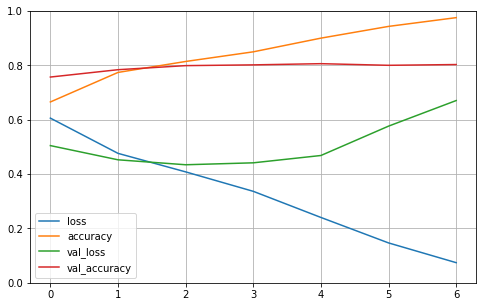

In [61]:
#plot model history
pd.DataFrame(history_1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [62]:
## Evaluate model 
model_1.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 5ms/step - loss: 0.6706 - accuracy: 0.8030


[0.670569658279419, 0.8029999732971191]

#### 3 blocks Model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       7

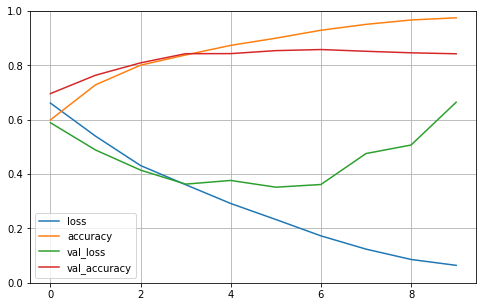

157/157 [==============================] - 1s 5ms/step - loss: 0.6645 - accuracy: 0.8426


[0.6644926071166992, 0.8425999879837036]

In [65]:
keras.backend.clear_session()
## Building CNN model
model_2 = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=[60, 60, 1], activation='relu', padding="SAME"),
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),


    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding="SAME"),
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding="SAME"),
    keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(2, activation='softmax'),
])

## Compile model
model_2.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

## Model summary
model_2.summary()

## Fit model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
history_2 = model_2.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid), callbacks=[callback])

## Plot model history
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history_2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Evaluate model 
model_2.evaluate(X_valid, y_valid)

#### Regularization Model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 60, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 64)        2

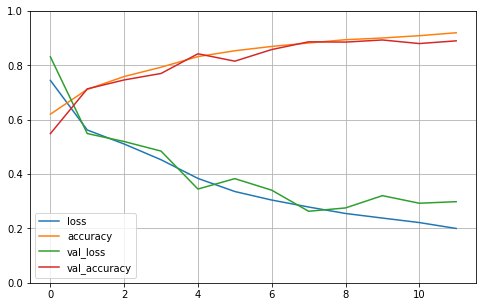

157/157 [==============================] - 1s 5ms/step - loss: 0.2984 - accuracy: 0.8902


[0.29840895533561707, 0.8902000188827515]

In [67]:
keras.backend.clear_session()
## Building CNN model
model_3 = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=[60, 60, 1], activation='relu', padding="SAME"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.5),

    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding="SAME"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding="SAME"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax'),
])

## Compile model
model_3.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

## Model summary
model_3.summary()

## Fit model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
history_3 = model_3.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid), callbacks=[callback])

## Plot model history
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history_3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Evaluate model 
model_3.evaluate(X_valid, y_valid)

#### Model From Kaggle
##### https://www.kaggle.com/rkb0023/cnn-classifier-cats-and-dogs#Model-Building

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        3

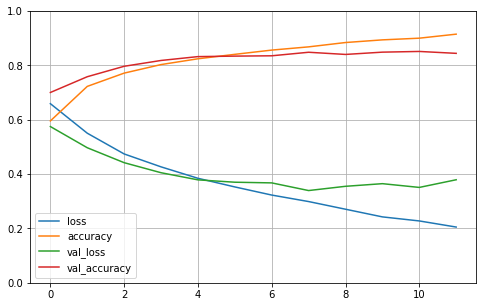

157/157 [==============================] - 1s 5ms/step - loss: 0.3791 - accuracy: 0.8442


[0.3791278898715973, 0.8442000150680542]

In [68]:
keras.backend.clear_session()
## Building CNN model
model_4 = keras.models.Sequential([
    keras.layers.Conv2D(128, kernel_size=(3,3), input_shape=[60, 60, 1], activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.15),

    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.1),

    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2, activation='softmax'),
])

## Compile model
model_4.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

## Model summary
model_4.summary()

## Fit model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
history_4 = model_4.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid), callbacks=[callback])

## Plot model history
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history_4.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Evaluate model 
model_4.evaluate(X_valid, y_valid)

### Compare all models

In [69]:
## Evaluate model 
M1=model_1.evaluate(X_valid, y_valid)
M2=model_2.evaluate(X_valid, y_valid)
M3=model_3.evaluate(X_valid, y_valid)
M4=model_4.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 5ms/step - loss: 0.3791 - accuracy: 0.8442


In [82]:
Models=["Model 1","Model 2","Model 3","Model 4"]
Loss=[M1[0],M2[0],M3[0],M4[0]]
Val_Accuracy=[M1[1],M2[1],M3[1],M4[1]]
df = pd.DataFrame (list(zip(Models,Loss,Val_Accuracy)), columns = ['Models','Loss',"Validation Accuracy"])
df

,Models,Loss,Validation Accuracy
0,Model 1,0.670570,0.8030
1,Model 2,0.664493,0.8426
2,Model 3,0.298409,0.8902
3,Model 4,0.379128,0.8442


### Using the model to predit the testing image

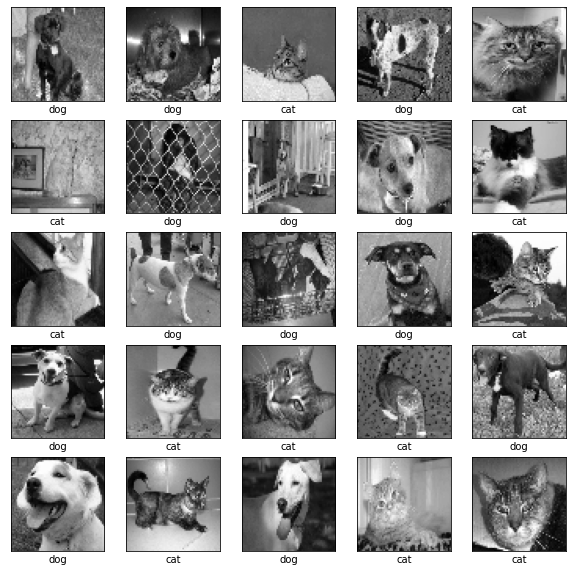

In [84]:
#Get the predictions for the test data
predicted_classes = model_3.predict_classes(X_test)

#Let's Visualize some predicted images 
plt.figure(figsize=(10,10))
rand = np.random.randint(0,1000*2,25)
for i in range(len(rand)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test[rand[i]], cmap="gray")
    plt.xlabel(CATEGORIES[predicted_classes[rand[i]]])